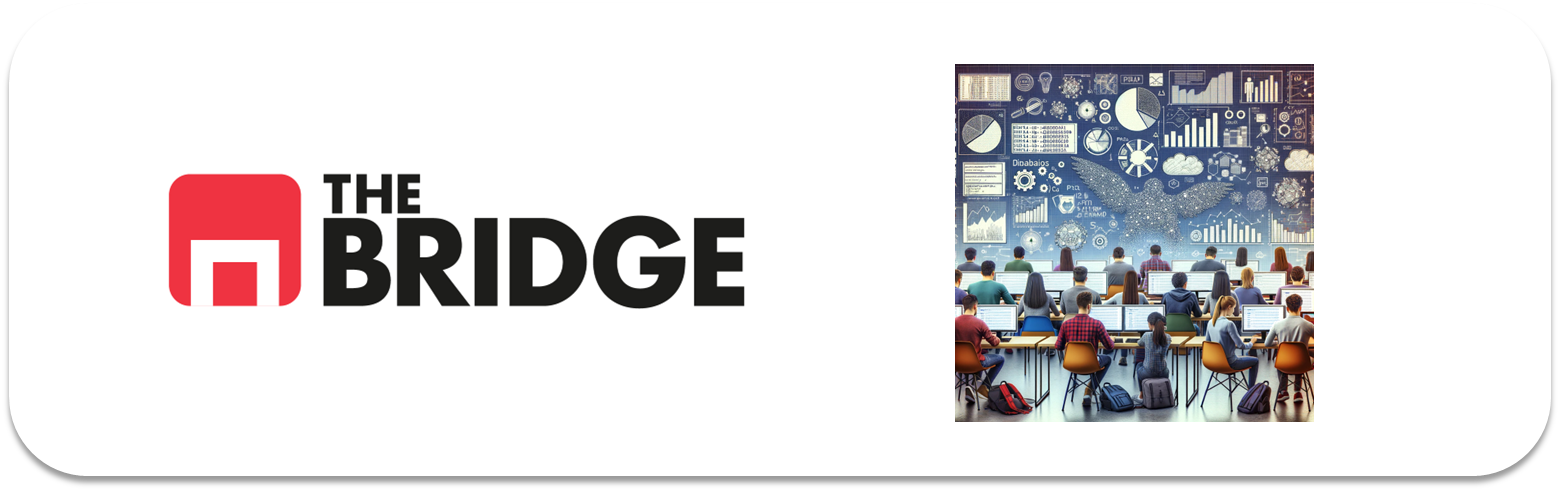

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve,roc_auc_score
from sklearn.preprocessing import OrdinalEncoder


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [113]:
#1. Carga el dataset del Titanic. 

df = pd.read_csv('./titanic.csv')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [115]:
df.deck.value_counts(True,dropna=False)

deck
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

In [116]:
#2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
df.drop(["parch","alive","embarked","deck","class","adult_male"],axis=1,inplace=True)


In [117]:
df.head()

,survived,pclass,sex,age,sibsp,fare,who,embark_town,alone
0,0,3,male,22.0,1,7.2500,man,Southampton,False
1,1,1,female,38.0,1,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,0,7.9250,woman,Southampton,True
3,1,1,female,35.0,1,53.1000,woman,Southampton,False
4,0,3,male,35.0,0,8.0500,man,Southampton,True


In [118]:
#3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
target="survived"

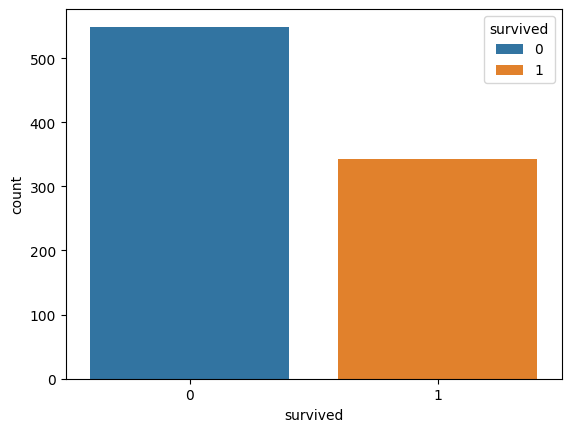

In [119]:
sns.countplot(x=target, data=df,hue=target)
plt.show()

razonablemente balanceado, el algoritmo debería funcionar bien

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'fare'}>, <Axes: >]], dtype=object)

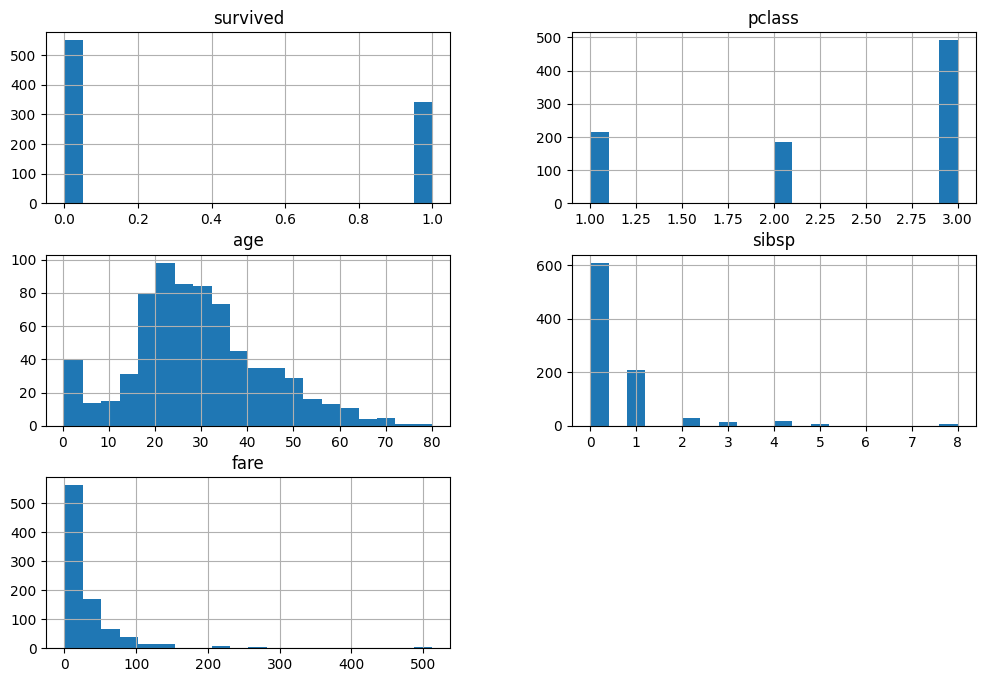

In [120]:
df.hist(bins=20, figsize=(12, 8))

In [121]:
#4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.

In [122]:
df = df.dropna(subset=['embark_town'])
df['embark_town'].value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [123]:
train_set, test_set = train_test_split(df, test_size= 0.2, stratify= df["embark_town"], random_state= 42)

In [124]:
train_set.embark_town.value_counts(True)

embark_town
Southampton    0.724332
Cherbourg      0.188467
Queenstown     0.087201
Name: proportion, dtype: float64

In [125]:
test_set.embark_town.value_counts(True)

embark_town
Southampton    0.724719
Cherbourg      0.191011
Queenstown     0.084270
Name: proportion, dtype: float64

In [126]:
#5. Construye las parejas X,y de train y test.
y_train=train_set["survived"]
y_test=test_set["survived"]
X_train=train_set.drop("survived",axis=1)
X_test=test_set.drop("survived",axis=1)

In [127]:
#6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       711 non-null    int64  
 1   sex          711 non-null    object 
 2   age          573 non-null    float64
 3   sibsp        711 non-null    int64  
 4   fare         711 non-null    float64
 5   who          711 non-null    object 
 6   embark_town  711 non-null    object 
 7   alone        711 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 45.1+ KB


In [128]:
moda = X_train['age'].mode()[0]
X_train['age'].fillna(moda, inplace=True)

In [129]:
#7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
df_eda = X_train.copy()
df_eda["survived"] = y_train.copy()

In [130]:
correlaciones_absolutas = np.abs(df_eda.corr(numeric_only= True)["survived"])
correlaciones_ordenadas = correlaciones_absolutas.sort_values(ascending=False)
correlaciones_ordenadas
#pclass,fare,alone

survived    1.000000
pclass      0.333723
fare        0.268742
alone       0.200779
age         0.038436
sibsp       0.006820
Name: survived, dtype: float64

In [131]:
variables_numericas=correlaciones_ordenadas.index.to_list()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


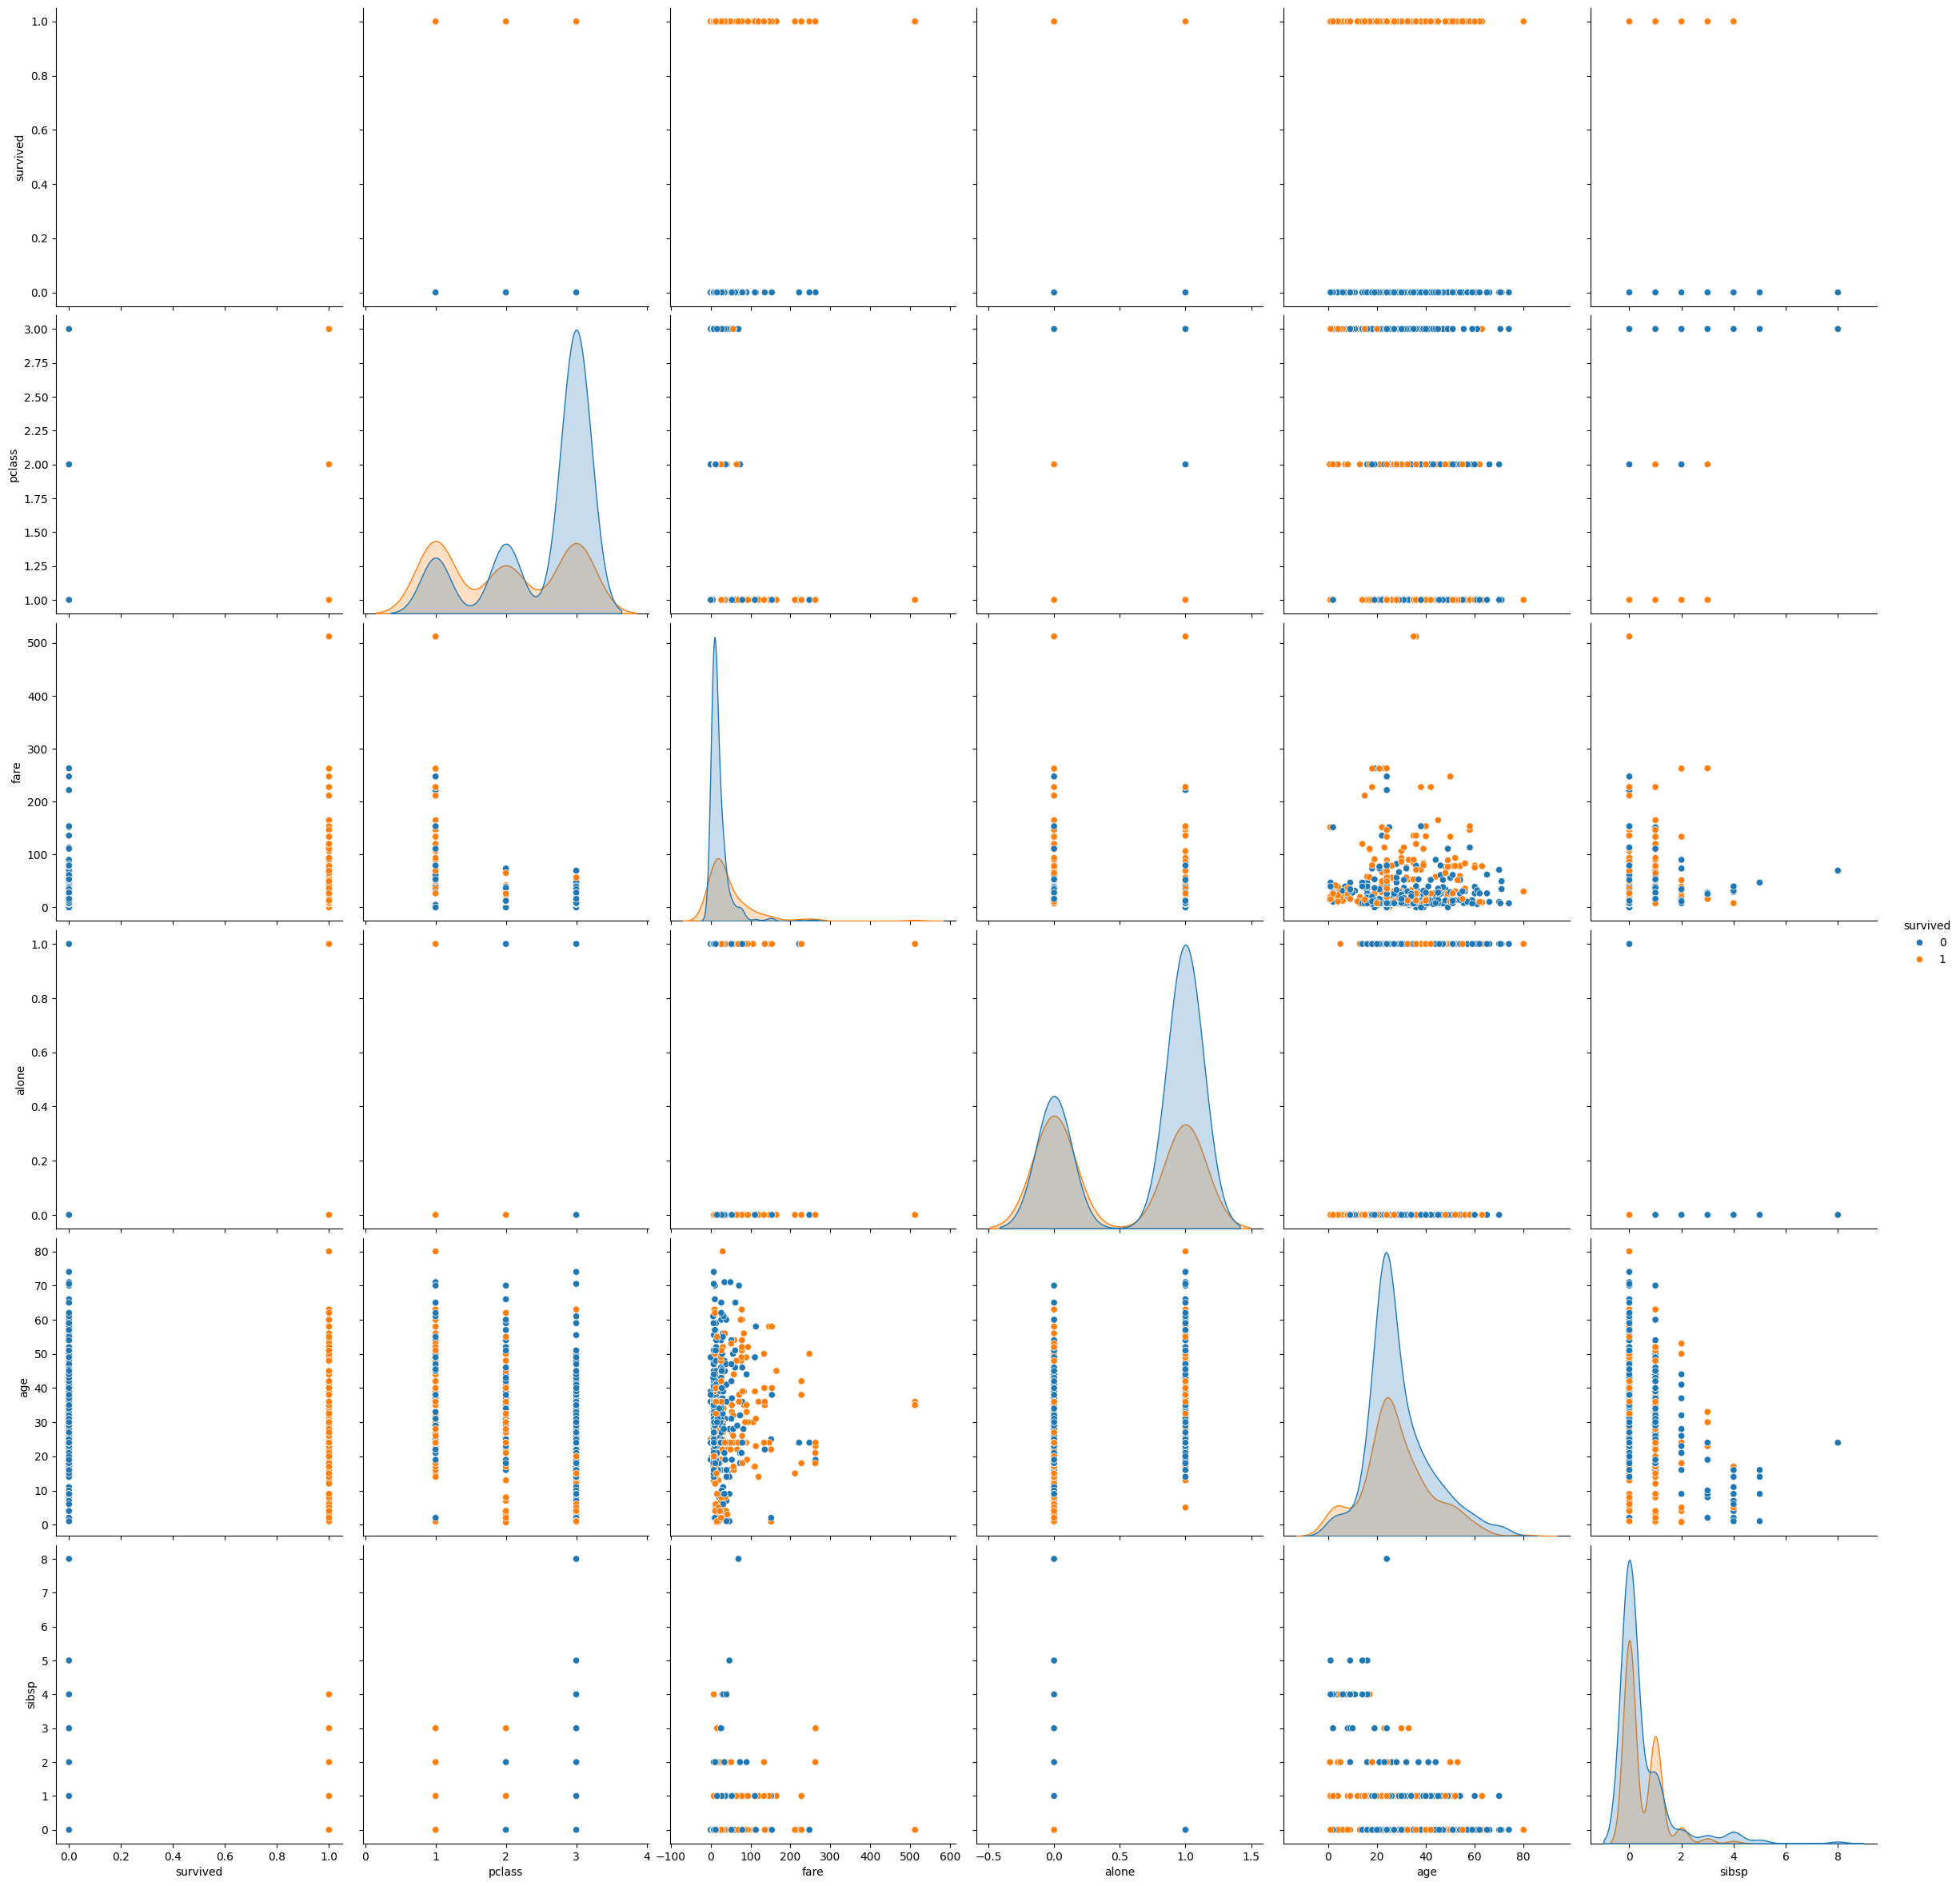

In [132]:
sns.pairplot(df_eda,
            hue='survived',
            height=4,
            vars=variables_numericas); 

In [133]:
def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(8, 4))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel("")
            plt.ylabel('')
            plt.xticks(rotation=45)
            ax.tick_params(axis='both', labelsize=8)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(8, 4))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(rotation=45)
        ax.tick_params(axis='both', labelsize=8)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()



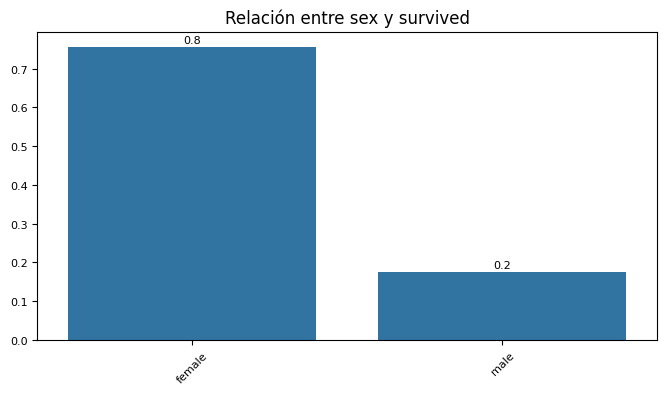

In [134]:
plot_categorical_numerical_relationship(df_eda,"sex","survived",show_values=True)

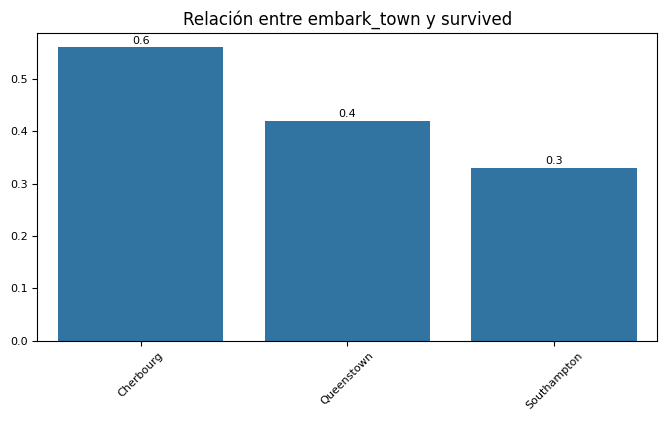

In [135]:
plot_categorical_numerical_relationship(df_eda,"embark_town","survived",show_values=True)

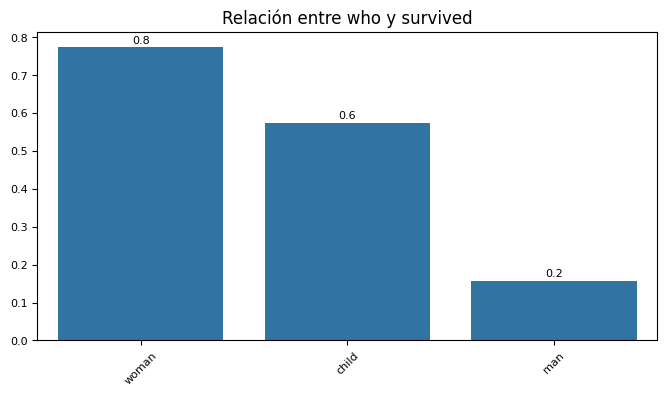

In [136]:
plot_categorical_numerical_relationship(df_eda,"who","survived",show_values=True)

In [137]:
### Features iniciales


features = ["who","embark_town","sex"]
features_num = ["pclass","fare","alone"]
target = "survived"

Son las que veo que tienen más peso a la hora de condicionar la variable target

In [138]:
#8. Trata las variables para que funcionen lo mejor posible en el modelo.
X_train = pd.get_dummies(X_train, columns = features, dtype= "int") 

<Axes: >

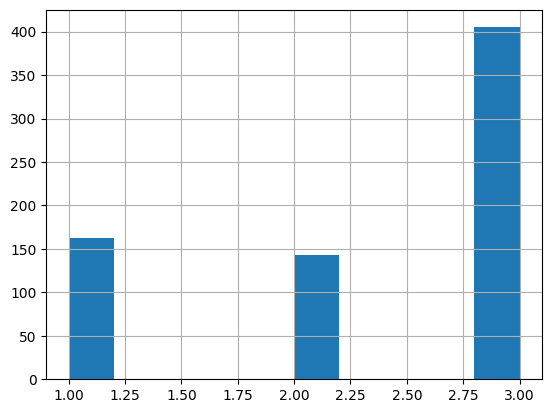

In [139]:
X_train.pclass.hist()

<Axes: >

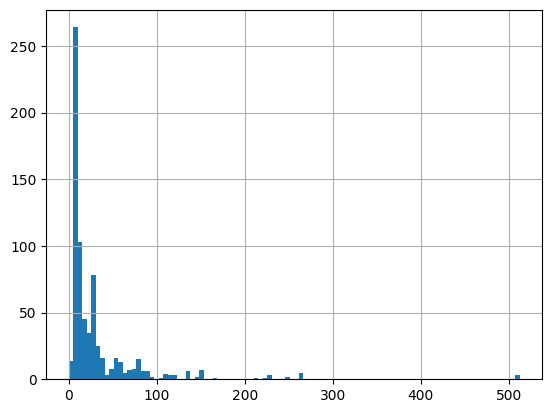

In [140]:
X_train.fare.hist(bins=100)

In [141]:
X_train.fare.describe()

count    711.000000
mean      31.646823
std       51.212661
min        0.000000
25%        7.895800
50%       14.000000
75%       30.285400
max      512.329200
Name: fare, dtype: float64

In [142]:
X_train["fare_log"] = X_train["fare"].apply(lambda x: np.log(x + 1))

<Axes: >

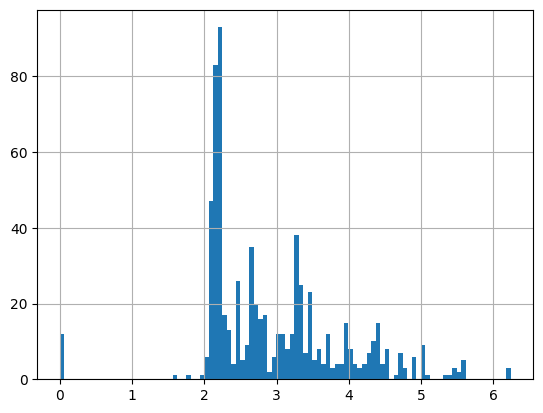

In [143]:
X_train.fare_log.hist(bins=100)

In [144]:
#9. Construye un modelo de regresión logística.

X_train.drop(["alone","sibsp","age","fare"],axis=1,inplace=True)
X_train

,pclass,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sex_female,sex_male,fare_log
46,3,0,1,0,0,1,0,0,1,2.803360
230,1,0,0,1,0,0,1,1,0,4.436456
657,3,0,0,1,0,1,0,1,0,2.803360
888,3,0,0,1,0,0,1,1,0,3.196630
809,1,0,0,1,0,0,1,1,0,3.990834
...,...,...,...,...,...,...,...,...,...,...
222,3,0,1,0,0,0,1,0,1,2.202765
167,3,0,0,1,0,0,1,1,0,3.363842
123,2,0,0,1,0,0,1,1,0,2.639057
150,2,0,1,0,0,0,1,0,1,2.604540


In [145]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000) 

clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [146]:
#10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.


In [147]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
pclass,-0.971472
who_child,0.631617
who_man,-1.393462
who_woman,0.761125
embark_town_Cherbourg,0.184506
embark_town_Queenstown,0.151536
embark_town_Southampton,-0.336762
sex_female,0.370493
sex_male,-0.371213
fare_log,-0.043246


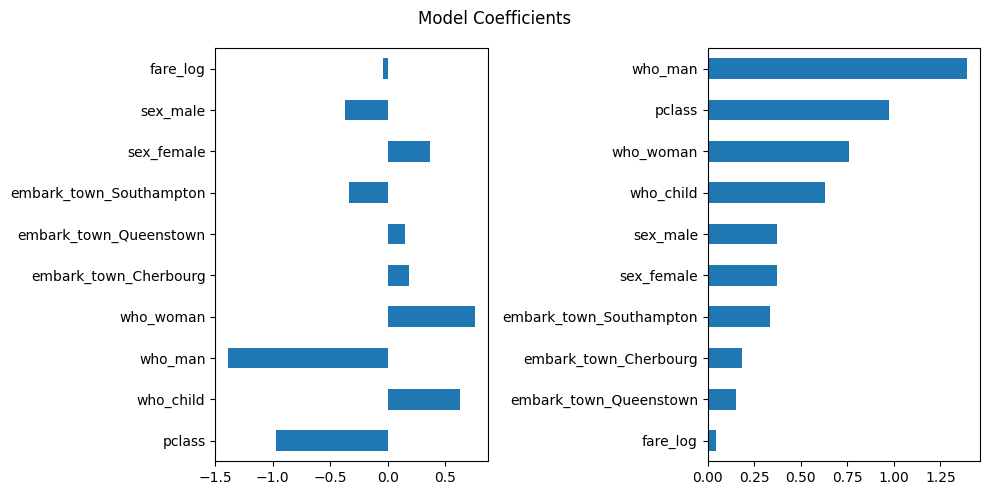

In [148]:
show_coefs(clf)

In [151]:
#11. Procesa el dataset de Test para que puedas usarlo en la evaluación 

moda = X_test['age'].mode()[0]
X_test['age'].fillna(moda, inplace=True)

In [152]:
col_str=["who","embark_town","sex"]
X_test = pd.get_dummies(X_test, columns = col_str, dtype= "int") 

In [154]:
X_test["fare_log"] = X_test["fare"].apply(lambda x: np.log(x + 1))

In [156]:
X_test.drop(["alone","sibsp","age","fare"],axis=1,inplace=True)
X_test

,pclass,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sex_female,sex_male,fare_log
223,3,0,1,0,0,0,1,0,1,2.185579
533,3,0,0,1,1,0,0,1,0,3.150952
557,1,0,1,0,1,0,0,0,1,5.431646
211,2,0,0,1,0,0,1,1,0,3.091042
318,1,0,0,1,0,0,1,1,0,5.111184
...,...,...,...,...,...,...,...,...,...,...
547,2,0,1,0,1,0,0,0,1,2.698841
82,3,0,0,1,0,1,0,1,0,2.173330
217,2,0,1,0,0,0,1,0,1,3.332205
132,3,0,0,1,0,0,1,1,0,2.740840


In [157]:
#12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

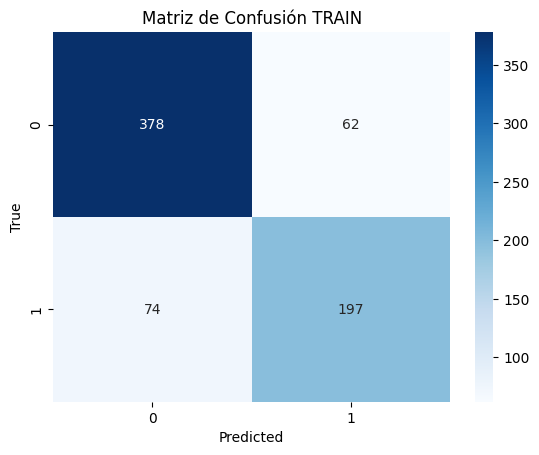

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       440
           1       0.76      0.73      0.74       271

    accuracy                           0.81       711
   macro avg       0.80      0.79      0.80       711
weighted avg       0.81      0.81      0.81       711



In [159]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, pred_train)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión TRAIN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
print(classification_report(y_train, pred_train))

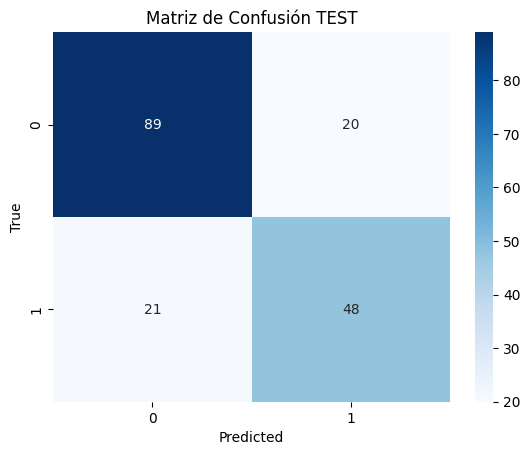

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       109
           1       0.71      0.70      0.70        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [160]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_test)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión TEST')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
print(classification_report(y_test, pred_test))

In [165]:
'''
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. 
Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)
'''
df = pd.read_csv('./titanic.csv')
es_hombre = df.who == "man"
south = df.embark_town == "Southampton"
fare = df.fare == 0
acompanado = df.sibsp == 0
edad = df.age.apply(lambda row: 30 <= row <= 40)
casos_favorables= len(df[es_hombre & south & fare & acompanado & edad])
casos_posibles=len(df[es_hombre & edad])
probabilidad=casos_favorables/casos_posibles
probabilidad

0.03508771929824561

In [ ]:
'''
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. 
Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. 
Entrena y evalua el modelo sólo con el classification_report.
'''

'\n14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. \nCambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. \nEntrena y evalua el modelo sólo con el classification_report.\n'